In [251]:
#importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
from sklearn.model_selection import StratifiedShuffleSplit


from sklearn.preprocessing import LabelEncoder



In [252]:
#lire la base de données
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [253]:
#voire les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [254]:
df.isnull().sum().sort_values(ascending=False)


Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [255]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [256]:
#Renseigner les valeurs manquantes 
cat_data= []
num_data = []
for i,c in enumerate(df.dtypes):
    if c == 'object': 
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])
cat_data = pd.DataFrame(cat_data).transpose()


num_data = pd.DataFrame(num_data).transpose()
num_data



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [257]:
#Pour les variable categoriques on va remplacer les valeurs manquantes par les valeurs qui dominent le plus
cat_data = cat_data.apply(lambda x: x.fillna(x.mode().iloc[0]))
cat_data.isnull().sum().any()

#Pour le variables numeriques on va remplacer les valeurs manquantes par les valeurs precedentes

num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum()







/var/folders/jb/zvnryxf1709fxh0j3m30y6zw0000gn/T/ipykernel_92837/2581166624.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill', inplace=True)


ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [258]:
#transformer la colonne target

target_value={ 'Y':1, 'N':0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace =True)
target: object = target.map(target_value)
target







0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [259]:
#Remplacer les valeurs categoriques par des valeurs numeriques 0,1,2

le = LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])
    
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [260]:
cat_data.drop('Loan_ID', axis=1, inplace=True)



In [261]:
X = pd.concat([cat_data, num_data], axis=1)
Y = target



In [262]:
target.value_counts()


Loan_Status
1    422
0    192
Name: count, dtype: int64

In [263]:
#la base de données pour analyse exploratoire
df = pd.concat([cat_data, num_data, target], axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,1
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0,1
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0,1
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0,1


le pourcentage des credits accordés est : 0.6872964169381107
le pourcentage des credits non accordés est : 0.3127035830618892


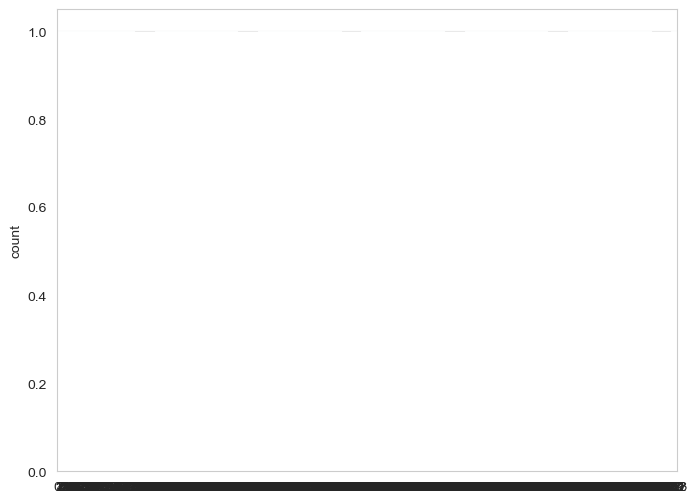

In [264]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.countplot(target)

yes = target.value_counts()[1]/len(target)
no = target.value_counts()[0]/len(target)
print(f'le pourcentage des credits accordés est : {yes}')
print(f'le pourcentage des credits non accordés est : {no}')
plt.show()


/Users/anessrb/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/anessrb/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


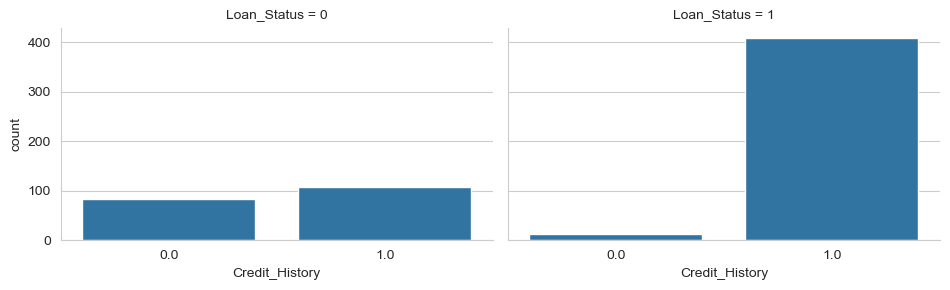

In [265]:
#Credit History
#Quand tu as un historique de credit t'as beaucoup de chance que ton credit soit accepté

grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

/Users/anessrb/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/anessrb/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


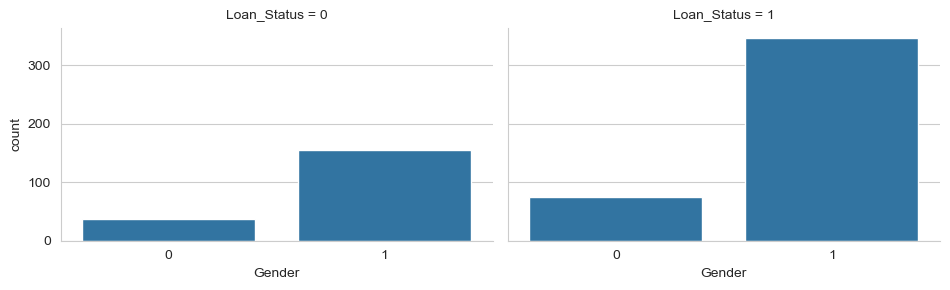

In [266]:
#Generalement les hommes ont plus de chance

grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Gender')

/Users/anessrb/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/anessrb/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


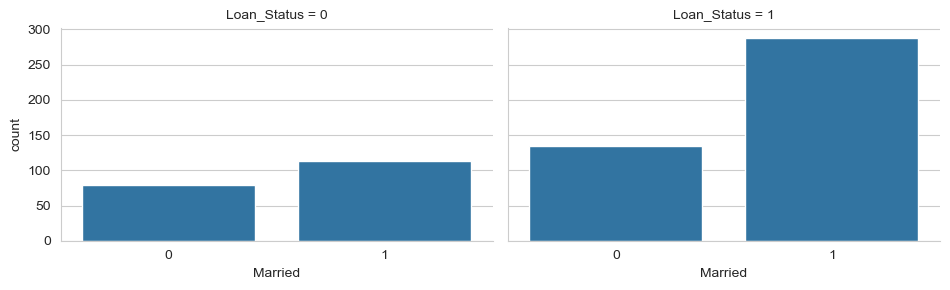

In [267]:
#L'ecart est relativement faible

grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Married')

/Users/anessrb/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/anessrb/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


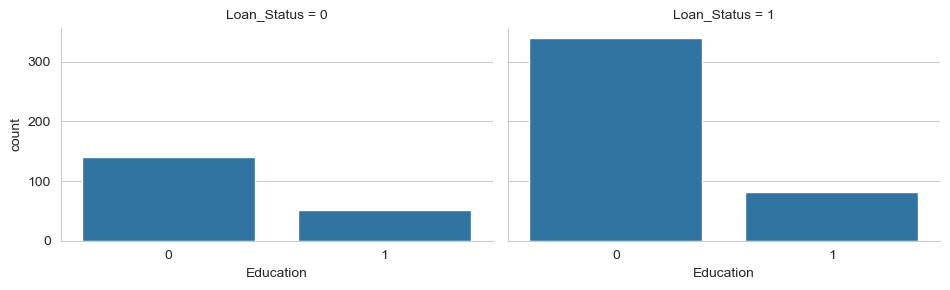

In [268]:
#Si t'as fait des etudes, t'as plus de chance encore
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Education')

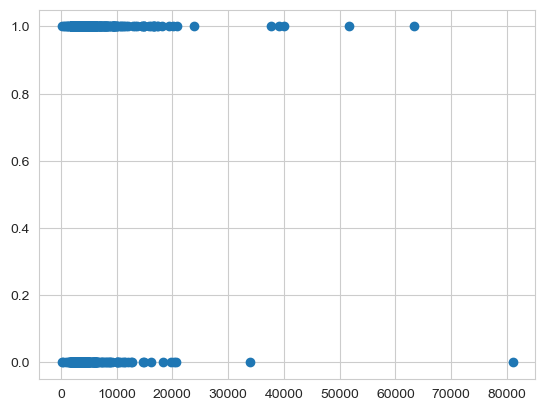

In [269]:
#revenu du demandeur
plt.scatter(df['ApplicantIncome'], df['Loan_Status'])

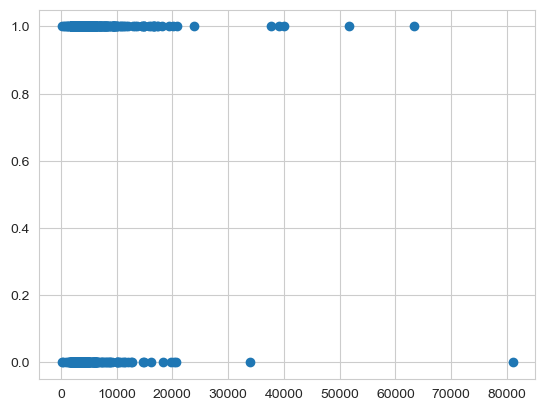

In [270]:
plt.scatter(df['ApplicantIncome'], df['Loan_Status'])


In [271]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


In [272]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(X,Y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    Y_train, Y_test = Y.iloc[train], Y.iloc[test]
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (491, 11)
Y_train shape: (491,)
X_test shape: (123, 11)
Y_test shape: (123,)


In [273]:
#On va appliquer trois algorithmes Logistic Regression, KNN, DecisionTree

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models={
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=1,random_state=42),
}

# La fonction de precision
def accuracy(y_true, y_pred, retu=False):
    accuracy = accuracy_score(y_true, y_pred)
    if retu:
        return accuracy
    else:
        print(f'la precision du modele est {accuracy}')


#C'est la fonction d'application des modeles        
def train_test_eval(models,X_train,Y_train,X_test,Y_test):
    for name,model in models.items():
        print(name, ':')
        model.fit(X_train,Y_train)
        accuracy(Y_test, model.predict(X_test))
        print('-'*30)
        
train_test_eval(models,X_train,Y_train,X_test,Y_test)
    




Logistic Regression :
la precision du modele est 0.8536585365853658
------------------------------
KNN :
la precision du modele est 0.6504065040650406
------------------------------
Decision Tree :
la precision du modele est 0.8455284552845529
------------------------------


/Users/anessrb/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [274]:
X_2 = X[['Credit_History','Married', 'CoapplicantIncome']]

In [275]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(X_2,Y):
    X_train, X_test = X_2.iloc[train], X_2.iloc[test]
    Y_train, Y_test = Y.iloc[train], Y.iloc[test]
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (491, 3)
Y_train shape: (491,)
X_test shape: (123, 3)
Y_test shape: (123,)


In [276]:
#On va appliquer trois algorithmes Logistic Regression, KNN, DecisionTree

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models={
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=1,random_state=42),
}

# La fonction de precision
def accuracy(y_true, y_pred, retu=False):
    accuracy = accuracy_score(y_true, y_pred)
    if retu:
        return accuracy
    else:
        print(f'la precision du modele est {accuracy}')


#C'est la fonction d'application des modeles        
def train_test_eval(models,X_train,Y_train,X_test,Y_test):
    for name,model in models.items():
        print(name, ':')
        model.fit(X_train,Y_train)
        accuracy(Y_test, model.predict(X_test))
        print('-'*30)
        
train_test_eval(models,X_train,Y_train,X_test,Y_test)
    


Logistic Regression :
la precision du modele est 0.8536585365853658
------------------------------
KNN :
la precision du modele est 0.6991869918699187
------------------------------
Decision Tree :
la precision du modele est 0.8455284552845529
------------------------------


In [279]:
Classifier = LogisticRegression()
Classifier.fit(X_2,Y)

LogisticRegression()

In [280]:
#Enregistrer le modele
pickle.dump(Classifier,open('model.pkl','wb'))  